In [1]:
import sys
import os
package_path = os.path.abspath("..")  
sys.path.insert(0, package_path)
#The path will be managed by conda or whatever on release, but this is fine for now.

In [2]:
import pandas as pd

In [3]:
import scMPRAforge as scm

In [3]:
#load the autoreload extension
%load_ext autoreload
#reload code on every execution
#(this may break objects)
#you can remove this & do dev in a notebook, then paste into the module when you are done.
%autoreload 2

In [4]:
scm.helloworld()

hello world!


In [5]:
DATA_ROOT="/home/mcn26/palmer_scratch/tabula_data/raw_recap/cohen_retina"

Load cohen mpra rep 1 and correct the sequencing errors in the cell barcode and UMI. 

(Error-checking code is currently unoptimized and may take a while to run. )

In [15]:
dat=scm.load_scMPRA_data(f"{DATA_ROOT}/read_wise_mpra_rep_1.tsv")
dat=scm.flatten_barcode_errors(dat,"cell_bc")
dat=scm.flatten_barcode_errors(dat,"umi")

In [17]:
print("DONE")

DONE


Dump to disc.

In [21]:
dat.to_csv(f"{DATA_ROOT}/read_wise_mpra_rep_1_corrected_barcodes.tsv",sep="\t")

In [16]:
dat

,cell_bc,rep_id,cre_id,cell_type,mpra_bc,umi,reads
0,AAACCCAAGACAAGCC,1,combo_Q50_crx5_crx4,Rod,TGTTACCTTTTTTTTGTGTGACAT,CTCGGTCTTTTT,10
1,AAACCCAAGACAAGCC,1,tail_conserve1_159_to_164,Rod,ATTATAAAAGATACTCATGAGTCT,CTATTTCGTCAG,3
2,AAACCCAAGACAAGCC,1,swap_crx3_to_ctaatccc_forward,Rod,AAACCTTACCCTTCCTTTACGCGG,CTATTTCGTCAG,1
3,AAACCCAAGACAAGCC,1,tail_conserve1_169_to_174,Rod,TTCCCGGGAAATGAGTCTTCAATC,CATGTTCCAAGT,1
4,AAACCCAAGACAAGCC,1,combo_Q50_crx4_crx3,Rod,AACTAGTCTATTAAAGCTAGCAGA,CATGTTCCAAGT,29
...,...,...,...,...,...,...,...
2881724,TTTGTTGTCGCTAATG,1,swap_crx1_to_gggcttag_reverse,Interneuron,CGCAGAGTACATGGAAAAAAAAAA,CTCGGTCTTTTT,1
2881725,TTTGTTGTCGCTAATG,1,tail_conserve3_210_to_215,Interneuron,CTTTATGAAGTTATTTTTTTTCTA,CTGAAGCTTCGT,1
2881726,TTTGTTGTCGCTAATG,1,tail_conserve3_240_to_245,Interneuron,CGCAGTACCTCTCGTATCCGATAT,CTGAAGCTTCGT,1
2881727,TTTGTTGTCGCTAATG,1,swap_crx4_to_ctaatccc_forward,Interneuron,GTATTGTGCTGTCTCTTCCATGGA,GGTGATTGCACT,1


PCR chimera removal.

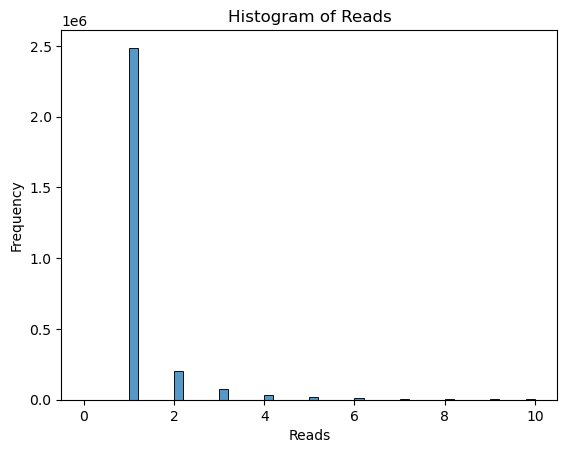

In [22]:
scm.graph_chimeric(dat,bins=50,binrange=(0,10))

In [23]:
cut=scm.cut_chimeric_reads(dat,2)

scMPRAforge: INFO: Original=99700 UMIs, Cut=32258 UMIs, Lost=67442 UMIs.


In [24]:
cut.to_csv(f"{DATA_ROOT}/read_wise_mpra_rep_1_corrected_barcodes_cut_chimeric.tsv",sep="\t")

Correct MPRA barcode errors

In [25]:
fixed_MPRA_bc=scm.flatten_barcode_errors(dat,"mpra_bc")

Dump to disc.

In [26]:
fixed_MPRA_bc.to_csv(f"{DATA_ROOT}/read_wise_mpra_rep_1_corrected_barcodes_cut_chimeric_corrected_mpra_bc.tsv",sep="\t")

In [21]:
#load intermediate table from disc.
#fixed_MPRA_bc=pd.read_csv(f"{DATA_ROOT}/read_wise_mpra_rep_1_corrected_barcodes_cut_chimeric_corrected_mpra_bc.tsv",sep="\t",index_col=0)

convert to UMI-wise

In [19]:
umi_wise=scm.read_wise_to_umi_wise(fixed_MPRA_bc,keep_reads=True)

Dump to disc.

In [20]:
umi_wise.to_csv(f"{DATA_ROOT}/umi_wise_mpra_rep_1_corrected_barcodes_cut_chimeric_corrected_mpra_bc.tsv",sep="\t")

In [16]:
#load intermediate table from disc
umi_wise=pd.read_csv(f"{DATA_ROOT}/umi_wise_mpra_rep_1_corrected_barcodes_cut_chimeric_corrected_mpra_bc.tsv",sep="\t",index_col=0)

Flatten barcodes.

In [17]:
umi_wise

,cell_bc,rep_id,cre_id,cell_type,mpra_bc,umis,reads
0,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,ACCTGTATGGAATGAGCGGGTCCA,1,1
1,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,CGGTTGATTTCCGGTTTACCAGAT,1,2
2,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,GTGTTTAATCGTAGACGCGACGAT,1,1
3,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,TCATTTAGAACATCACCTTAGACT,1,1
4,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,TCCATGGTAGCTGAATCTATCCCC,1,1
...,...,...,...,...,...,...,...
2003861,TTTGTTGTCGCTAATG,1,tail_conserve1_159_to_164,Interneuron,AAGGTTTTGAACATCCTGTTACGT,1,1
2003862,TTTGTTGTCGCTAATG,1,tail_conserve3_210_to_215,Interneuron,CTTTATGAAGTTATTTTTTTTCTA,1,1
2003863,TTTGTTGTCGCTAATG,1,tail_conserve3_240_to_245,Interneuron,CGCAGTACCTCTCGTATCCGATAT,1,1
2003864,TTTGTTGTCGCTAATG,1,tail_conserve5_443_to_448,Interneuron,GTACTATTTTACTTACAAGTTCAA,1,1


In [19]:
flattened=scm.flatten_mpra_barcodes(umi_wise)
flattened

,cell_bc,rep_id,cre_id,cell_type,umis,reads
0,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,7,8
1,AAACCCAAGACAAGCC,1,combo_Mute_crx2,Rod,2,2
2,AAACCCAAGACAAGCC,1,combo_Mute_crx3_crx1,Rod,3,3
3,AAACCCAAGACAAGCC,1,combo_Mute_crx4,Rod,3,3
4,AAACCCAAGACAAGCC,1,combo_Mute_crx4_crx2,Rod,1,1
...,...,...,...,...,...,...
304488,TTTGTTGTCGCTAATG,1,tail_conserve1_159_to_164,Interneuron,1,1
304489,TTTGTTGTCGCTAATG,1,tail_conserve3_210_to_215,Interneuron,1,1
304490,TTTGTTGTCGCTAATG,1,tail_conserve3_240_to_245,Interneuron,1,1
304491,TTTGTTGTCGCTAATG,1,tail_conserve5_443_to_448,Interneuron,1,1


dump to disc

In [20]:
flattened.to_csv(f"{DATA_ROOT}/umi_wise_mpra_rep_1_corrected_barcodes_cut_chimeric_corrected_mpra_bc_flattened_mpra.tsv",sep="\t")

In [8]:
#load
flattened=pd.read_csv(f"{DATA_ROOT}/umi_wise_mpra_rep_1_corrected_barcodes_cut_chimeric_corrected_mpra_bc_flattened_mpra.tsv",sep="\t")

Now we need to load and error-correct the u6 table...

In [6]:
u6_r1=pd.read_csv(f"{DATA_ROOT}/u6_rep_1.tsv",sep="\t")
u6_r1

,reads,cell_bc,umi,cell_type,rep_id,cre_id
0,29,AACAAGACACGGTGAA,TTGCTCTTAACG,Rod,1,ebox_gcagctgg_to_gcagcggg
1,45,AACCCAACACAAGTTC,CTTCCGATCTAC,Mueller Glia,1,tail_conserve5_468_to_473
2,8,AAGTCGTGTGGACTAG,TCTTCTCCTTAA,Rod,1,ebox_gcagctgg_to_gcagctag
3,1,AATCACGGTCTACAGT,AGTACTCTTCCC,Rod,1,combo_Q50_crx5_crx1
4,114,AATCACGGTCTACAGT,AGTGCTCTTCCC,Rod,1,combo_Q50_crx5_crx1
...,...,...,...,...,...,...
404,1,TTTCCTCTCGTTGCCT,GCCAACGTCAGT,Rod,1,combo_Q50_crx4_crx2
405,1,TTTCCTCTCGTTGCCT,TTCATGCGATTT,Rod,1,tail_conserve5_443_to_448
406,2,TTTGATCAGACCATAA,TGTCTCAAGGAC,Rod,1,combo_Mute_crx2
407,1,TTTGATCAGACCATAA,TTAATGAGGACC,Rod,1,combo_Mute_crx2


In [9]:
u6_r1=scm.flatten_barcode_errors(u6_r1,"cell_bc")
u6_r1=scm.flatten_barcode_errors(u6_r1,"umi")
print("DONE")

DONE


Now let's flatten umis to umi count...

In [12]:
grouping_columns = [col for col in u6_r1.columns if col not in ['reads', 'umi']]

aggregations = {
    'umis': ('umi', 'nunique')  # Count unique UMIs
}

u6_r1.groupby(grouping_columns).agg(**aggregations).reset_index()

,cell_bc,cell_type,rep_id,cre_id,umis
0,AACAAGACACGGTGAA,Rod,1,ebox_gcagctgg_to_gcagcggg,1
1,AACCCAACACAAGTTC,Mueller Glia,1,tail_conserve5_468_to_473,1
2,AAGTCGTGTGGACTAG,Rod,1,ebox_gcagctgg_to_gcagctag,1
3,AATCACGGTCTACAGT,Rod,1,combo_Q50_crx3,1
4,AATCACGGTCTACAGT,Rod,1,combo_Q50_crx5_crx1,2
...,...,...,...,...,...
218,TTTCAGTGTGGACTGA,Rod,1,combo_Mute_crx2,1
219,TTTCCTCTCGTTGCCT,Rod,1,combo_Q50_crx4_crx2,1
220,TTTCCTCTCGTTGCCT,Rod,1,swap_crx3_to_cttatccc_forward,1
221,TTTCCTCTCGTTGCCT,Rod,1,tail_conserve5_443_to_448,3


We'll add 'true zeroes' (cases where there are transfection reporter UMIs but not MPRA constuct UMIs). 

We'll begin by finding all combinations of cell_bc, rep_id, cre_id which appear in u6 but not in pol2

In [17]:
#find all rows only in u6
pd.merge(left=flattened, right=u6_r1, how='left', indicator=True, on=['cell_bc','rep_id'])#.query("_merge == 'right_only'")

,Unnamed: 0,cell_bc,rep_id,cre_id_x,cell_type_x,umis,reads_x,reads_y,umi,cell_type_y,cre_id_y,_merge
0,0,AAACCCAAGACAAGCC,1,combo_Mute_crx1,Rod,7,8,NaN,NaN,NaN,NaN,left_only
1,1,AAACCCAAGACAAGCC,1,combo_Mute_crx2,Rod,2,2,NaN,NaN,NaN,NaN,left_only
2,2,AAACCCAAGACAAGCC,1,combo_Mute_crx3_crx1,Rod,3,3,NaN,NaN,NaN,NaN,left_only
3,3,AAACCCAAGACAAGCC,1,combo_Mute_crx4,Rod,3,3,NaN,NaN,NaN,NaN,left_only
4,4,AAACCCAAGACAAGCC,1,combo_Mute_crx4_crx2,Rod,1,1,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
312000,304488,TTTGTTGTCGCTAATG,1,tail_conserve1_159_to_164,Interneuron,1,1,NaN,NaN,NaN,NaN,left_only
312001,304489,TTTGTTGTCGCTAATG,1,tail_conserve3_210_to_215,Interneuron,1,1,NaN,NaN,NaN,NaN,left_only
312002,304490,TTTGTTGTCGCTAATG,1,tail_conserve3_240_to_245,Interneuron,1,1,NaN,NaN,NaN,NaN,left_only
312003,304491,TTTGTTGTCGCTAATG,1,tail_conserve5_443_to_448,Interneuron,1,1,NaN,NaN,NaN,NaN,left_only


Hrm. Does not seem to add any information..?